In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
test = pd.read_csv('/content/gdrive/MyDrive/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1374 non-null   int64 
 1   Candidate       1374 non-null   object
 2   Constituency ∇  1374 non-null   object
 3   Party           1374 non-null   object
 4   Criminal Case   1374 non-null   int64 
 5   Total Assets    1374 non-null   object
 6   Liabilities     1374 non-null   object
 7   state           1374 non-null   object
dtypes: int64(2), object(6)
memory usage: 86.0+ KB


In [4]:

data = pd.read_csv('/content/gdrive/MyDrive/train.csv')
df = data.copy()
df = df.drop(['Candidate', 'ID', 'Constituency ∇'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Party          2059 non-null   object
 1   Criminal Case  2059 non-null   int64 
 2   Total Assets   2059 non-null   object
 3   Liabilities    2059 non-null   object
 4   state          2059 non-null   object
 5   Education      2059 non-null   object
dtypes: int64(1), object(5)
memory usage: 96.6+ KB


In [5]:
import re

def convert_assets(assets_str):
    # Remove the '+' sign and whitespace
    assets_str = assets_str.replace('+', '').replace(' ', '')

    if 'Crore' in assets_str:
        value = float(re.findall(r'\d+', assets_str)[0])
        return value * 10000000
    elif 'Lac' in assets_str:
        value = float(re.findall(r'\d+', assets_str)[0])
        return value * 100000
    elif 'Thou' in assets_str:
        value = float(re.findall(r'\d+', assets_str)[0])
        return value * 1000
    elif 'Hund' in assets_str:
        value = float(re.findall(r'\d+', assets_str)[0])
        return value * 100
    else:
        return float(assets_str)

df['Total Assets'] = df['Total Assets'].apply(convert_assets)
df['Liabilities'] = df['Liabilities'].apply(convert_assets)

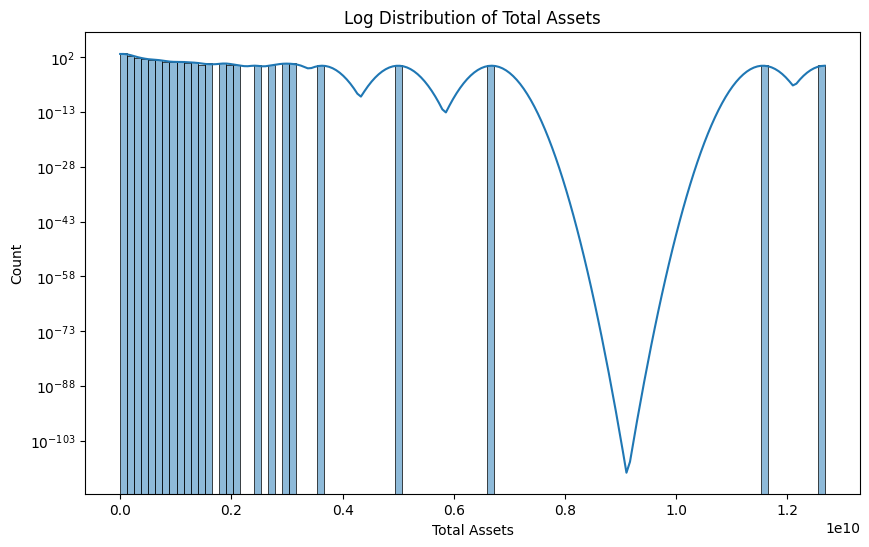

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Assets'], bins=100, kde=True)
plt.title('Log Distribution of Total Assets')
plt.yscale('log')
plt.show()


In [7]:
df['Education'].value_counts()


Education
Graduate                 531
Post Graduate            432
12th Pass                349
Graduate Professional    339
10th Pass                227
8th Pass                  78
Doctorate                 52
Others                    28
Literate                  14
5th Pass                   9
Name: count, dtype: int64

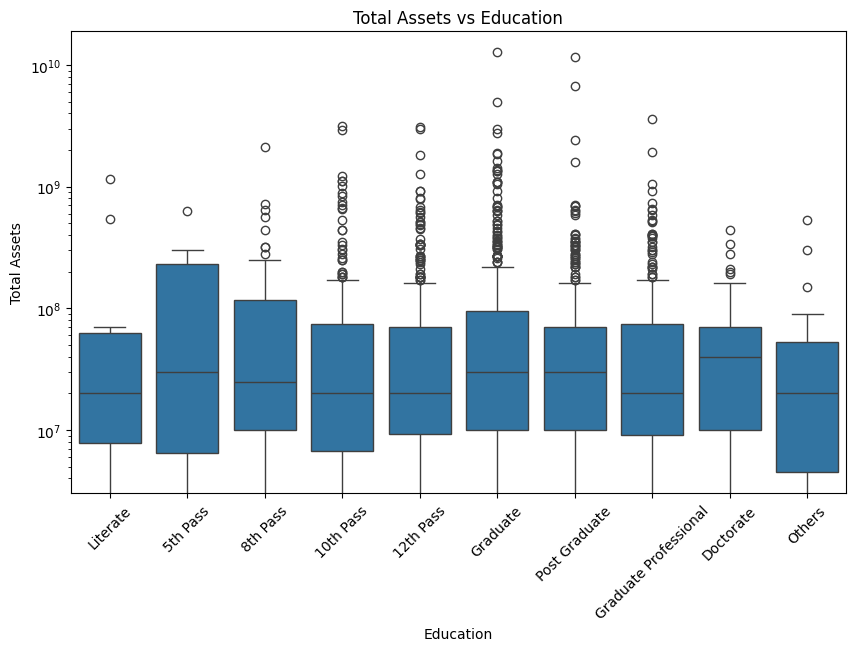

In [8]:
education_order = ['Literate', '5th Pass', '8th Pass', '10th Pass', '12th Pass', 'Graduate', 'Post Graduate','Graduate Professional', 'Doctorate', 'Others']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Total Assets', data=df, order=education_order)
plt.title('Total Assets vs Education')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()


In [9]:
le = LabelEncoder()
lee = LabelEncoder()
df['Education'] = lee.fit_transform(df['Education'])
df['Party'] = le.fit_transform(df['Party'])
df['state'] = le.fit_transform(df['state'])

In [10]:
test = test.drop(['Candidate', 'ID', 'Constituency ∇'], axis=1)
test['Total Assets'] = test['Total Assets'].apply(convert_assets)
test['Liabilities'] = test['Liabilities'].apply(convert_assets)
test['Party'] = le.fit_transform(test['Party'])
test['state'] = le.fit_transform(test['state'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Party          1374 non-null   int64  
 1   Criminal Case  1374 non-null   int64  
 2   Total Assets   1374 non-null   float64
 3   Liabilities    1374 non-null   float64
 4   state          1374 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 53.8 KB


In [11]:
X = df.drop(['Education'], axis=1)
# X = pd.get_dummies(X)
y = df['Education']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Party          2059 non-null   int64  
 1   Criminal Case  2059 non-null   int64  
 2   Total Assets   2059 non-null   float64
 3   Liabilities    2059 non-null   float64
 4   state          2059 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 80.6 KB


In [12]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [13]:
y_pred = knn.predict(X_test)


In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy}')

Accuracy of the model: 0.1966019417475728


In [15]:
prediction = knn.predict(test)
prediction

array([9, 9, 5, ..., 9, 9, 5])

In [16]:
submission = pd.DataFrame({'ID': range(0, len(prediction)), 'Education': lee.inverse_transform(prediction)})
# submission['ID'] = submission['ID'] - 1
submission.to_csv('/content/gdrive/MyDrive/nsubmissions.csv', index=False)

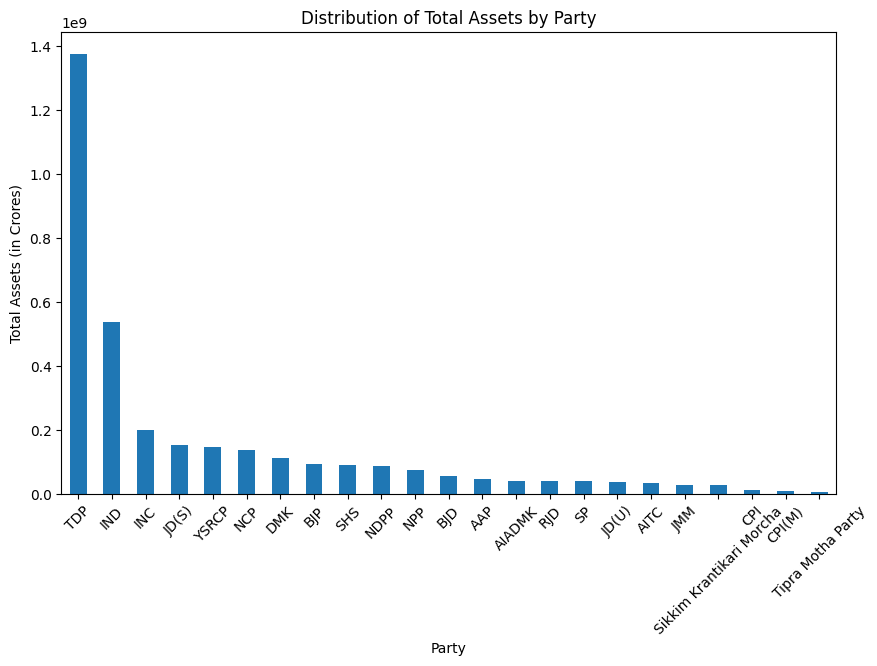

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
df = pd.read_csv('/content/gdrive/MyDrive/train.csv')

# Percentage Distribution of Parties with Candidates having the Most Criminal Records
df['Total Assets'] = df['Total Assets'].apply(convert_assets)
party_assets = df.groupby('Party')['Total Assets'].agg(['mean', 'median'])
party_assets = party_assets.sort_values(by='mean', ascending=False)

plt.figure(figsize=(10, 6))
party_assets['mean'].plot(kind='bar')
plt.title('Distribution of Total Assets by Party')
plt.xlabel('Party')
plt.ylabel('Total Assets (in Crores)')
plt.xticks(rotation=45)
plt.savefig('/content/gdrive/MyDrive/party_assets_dist.png')



<Figure size 1000x600 with 0 Axes>

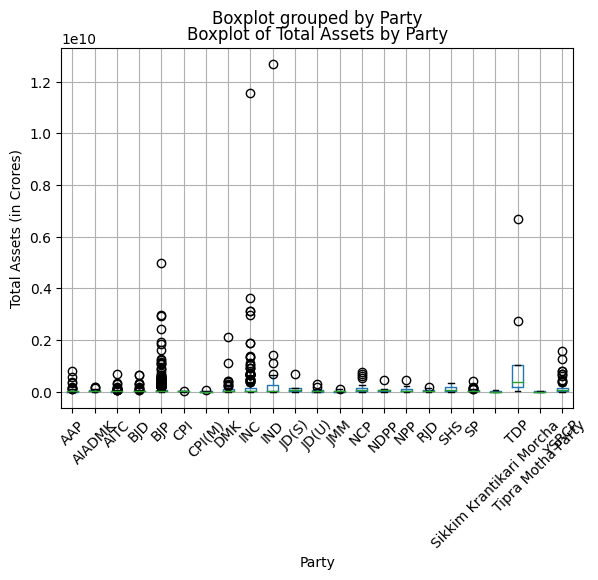

In [27]:
# Percentage Distribution of Parties with the Most Wealthy Candidates
plt.figure(figsize=(10, 6))
df.boxplot(column='Total Assets', by='Party')
plt.title('Boxplot of Total Assets by Party')
plt.xlabel('Party')
plt.ylabel('Total Assets (in Crores)')
plt.xticks(rotation=45)
plt.savefig('/content/gdrive/MyDrive/party_assets_boxplot.png')



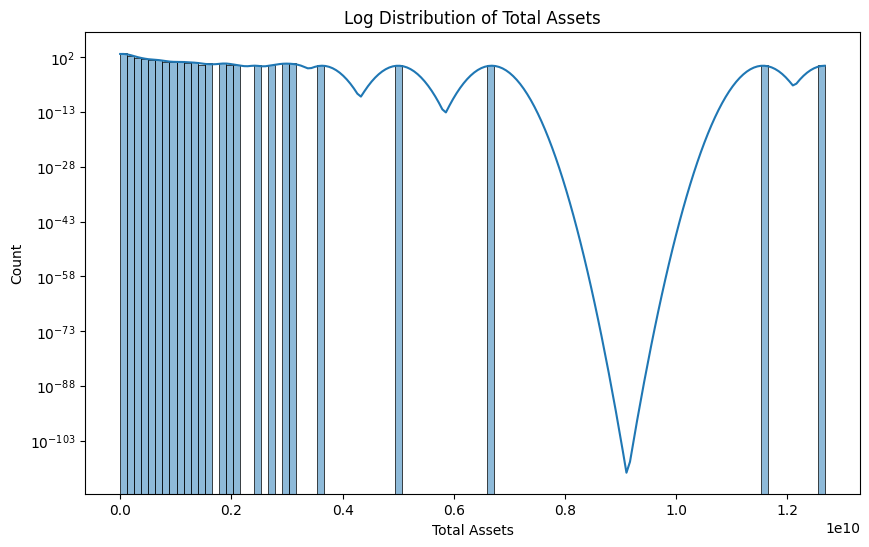

In [28]:
# Other Informative Plot: Histogram of Total Assets
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Assets'], bins=100, kde=True)
plt.title('Log Distribution of Total Assets')
plt.yscale('log')
plt.savefig('/content/gdrive/MyDrive/total_assets_hist.png')

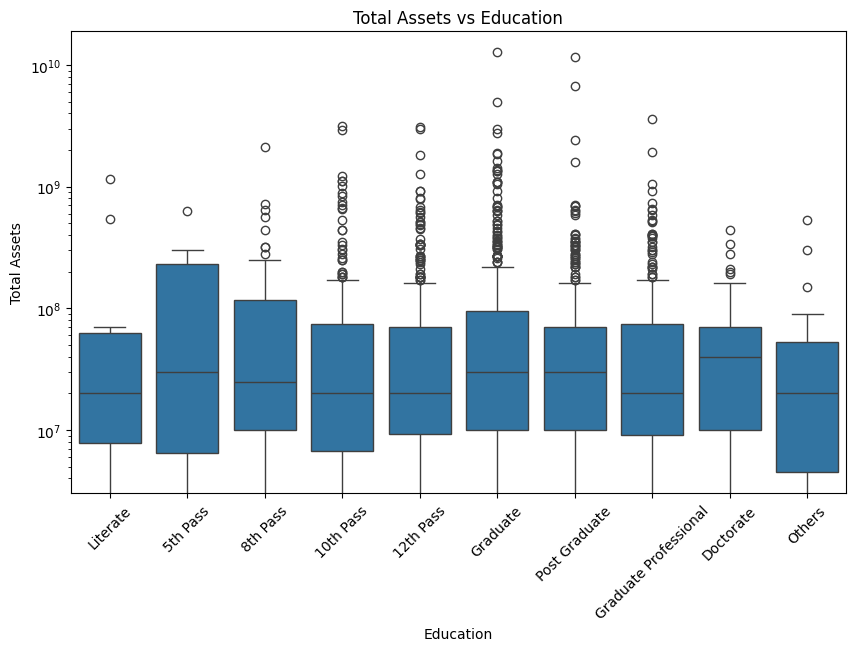

In [25]:
education_order = ['Literate', '5th Pass', '8th Pass', '10th Pass', '12th Pass', 'Graduate', 'Post Graduate','Graduate Professional', 'Doctorate', 'Others']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Total Assets', data=df, order=education_order)
plt.title('Total Assets vs Education')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()